# New York notebook

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import primary modules
import pandas as pd # primary data structure library
import numpy as np  # useful for many scientific computing in Python
%pip install geopy
import requests
%pip install lxml
import lxml.html as lh
%pip install openpyxl
print("done")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
done


In [3]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


# 1. Get NYC housing costs data

In [4]:
#Read in data and create data frame
csv_path = 'C:/Users/afrop/OneDrive/Documents/WORK/Python/Coursera_Capstone/Week4_5/SourceData/Zip_Zhvi_AllHomes.csv'
df = pd.read_csv(csv_path)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31/01/1996,...,31/07/2019,31/08/2019,30/09/2019,31/10/2019,30/11/2019,31/12/2019,31/01/2020,29/02/2020,31/03/2020,30/04/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,228469.0,...,1260585,1240102,1224381,1211284,1207492,1204185,1185658,1160006,1127516,1110230
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,210541.0,...,492937,492319,491407,490438,489481,488757,488706,489918,491519,492521
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,240523.0,...,1149638,1141705,1126903,1118421,1122523,1143524,1165940,1183320,1188817,1204832
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200323.0,...,335498,335547,335698,335753,335775,335930,335747,336062,336673,337926
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,285077.0,...,645357,644640,643348,642298,640848,639464,639040,639083,639364,638435


In [5]:
df.shape

(30391, 301)

In [6]:
list(df.columns.values)

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '31/01/1996',
 '29/02/1996',
 '31/03/1996',
 '30/04/1996',
 '31/05/1996',
 '30/06/1996',
 '31/07/1996',
 '31/08/1996',
 '30/09/1996',
 '31/10/1996',
 '30/11/1996',
 '31/12/1996',
 '31/01/1997',
 '28/02/1997',
 '31/03/1997',
 '30/04/1997',
 '31/05/1997',
 '30/06/1997',
 '31/07/1997',
 '31/08/1997',
 '30/09/1997',
 '31/10/1997',
 '30/11/1997',
 '31/12/1997',
 '31/01/1998',
 '28/02/1998',
 '31/03/1998',
 '30/04/1998',
 '31/05/1998',
 '30/06/1998',
 '31/07/1998',
 '31/08/1998',
 '30/09/1998',
 '31/10/1998',
 '30/11/1998',
 '31/12/1998',
 '31/01/1999',
 '28/02/1999',
 '31/03/1999',
 '30/04/1999',
 '31/05/1999',
 '30/06/1999',
 '31/07/1999',
 '31/08/1999',
 '30/09/1999',
 '31/10/1999',
 '30/11/1999',
 '31/12/1999',
 '31/01/2000',
 '29/02/2000',
 '31/03/2000',
 '30/04/2000',
 '31/05/2000',
 '30/06/2000',
 '31/07/2000',
 '31/08/2000',
 '30/09/2000',
 '31/10/2000',
 '30/11/2000',
 

In [7]:
#new dataframe with only New York data, and only last column with 30/4/20 data for house costs 
df = df[df['City'] == 'New York'].reset_index(drop=True)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31/01/1996,...,31/07/2019,31/08/2019,30/09/2019,31/10/2019,30/11/2019,31/12/2019,31/01/2020,29/02/2020,31/03/2020,30/04/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,228469.0,...,1260585,1240102,1224381,1211284,1207492,1204185,1185658,1160006,1127516,1110230
1,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,240523.0,...,1149638,1141705,1126903,1118421,1122523,1143524,1165940,1183320,1188817,1204832
2,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,929915,950335,964852,969105,968315,967768,970482,967564,966896,967241
3,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,175833.0,...,683327,676650,673104,667076,661378,655461,651114,645560,640282,637636
4,61807,11,10467,Zip,NY,NY,New York,New York-Newark-Jersey City,Bronx County,65434.0,...,184173,186060,188512,190950,192243,193360,193455,193985,193415,194279


In [8]:
df = df[['City', 'CountyName', 'RegionName', '30/04/2020']]
df.head()

,City,CountyName,RegionName,30/04/2020
0,New York,New York County,10025,1110230
1,New York,New York County,10023,1204832
2,New York,New York County,10002,967241
3,New York,Kings County,11226,637636
4,New York,Bronx County,10467,194279


In [9]:
df.rename(columns={'RegionName':'ZIP', '30/04/2020': 'AVE House Price $'}, inplace=True)
#df.rename(columns={'RegionName':'ZIP'}, inplace=True)
df.head()

,City,CountyName,ZIP,AVE House Price $
0,New York,New York County,10025,1110230
1,New York,New York County,10023,1204832
2,New York,New York County,10002,967241
3,New York,Kings County,11226,637636
4,New York,Bronx County,10467,194279


In [10]:
csv_path2 = 'https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data'
df2 = pd.read_csv(csv_path2)
df2.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [11]:
df3 = pd.merge(df, df2, on="ZIP")
df3.head()

,City,CountyName,ZIP,AVE House Price $,LAT,LNG
0,New York,New York County,10025,1110230,40.798601,-73.966622
1,New York,New York County,10023,1204832,40.775921,-73.982607
2,New York,New York County,10002,967241,40.715775,-73.986212
3,New York,Kings County,11226,637636,40.646448,-73.956649
4,New York,Bronx County,10467,194279,40.869953,-73.865746


In [12]:
df3.CountyName.unique()

array(['New York County', 'Kings County', 'Bronx County', 'Queens County',
       'Richmond County', 'Cortland County'], dtype=object)

In [13]:
#replace county names with Boroughs
df3.replace({'New York County': 'Manhatten', 'Bronx County': 'Bronx', 'Queens County': 'Queens', 'Kings County':'Brooklyn', 'Richmond County':'Staten Island'}, inplace=True)
df3.rename(columns={'CountyName':'Borough'}, inplace=True)
df3.head()

,City,Borough,ZIP,AVE House Price $,LAT,LNG
0,New York,Manhatten,10025,1110230,40.798601,-73.966622
1,New York,Manhatten,10023,1204832,40.775921,-73.982607
2,New York,Manhatten,10002,967241,40.715775,-73.986212
3,New York,Brooklyn,11226,637636,40.646448,-73.956649
4,New York,Bronx,10467,194279,40.869953,-73.865746


In [14]:
df3.Borough.unique()

array(['Manhatten', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island',
       'Cortland County'], dtype=object)

In [15]:
#Cortland County aint in NYC - its an error in raw data, so deleting
df3 = df3 = df3[df3.Borough != 'Cortland County']
df3.Borough.unique()

array(['Manhatten', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],
      dtype=object)

In [16]:
df3

,City,Borough,ZIP,AVE House Price $,LAT,LNG
0,New York,Manhatten,10025,1110230,40.798601,-73.966622
1,New York,Manhatten,10023,1204832,40.775921,-73.982607
2,New York,Manhatten,10002,967241,40.715775,-73.986212
3,New York,Brooklyn,11226,637636,40.646448,-73.956649
4,New York,Bronx,10467,194279,40.869953,-73.865746
...,...,...,...,...,...,...
167,New York,Manhatten,10006,838092,40.709614,-74.012954
168,New York,Manhatten,10004,1269845,40.688630,-74.018244
169,New York,Bronx,10464,526501,40.867787,-73.799920
170,New York,Queens,11430,687458,40.646964,-73.784813


# 2. Get NYC population and income data

In [17]:
csv_path3 = 'C:/Users/afrop/OneDrive/Documents/WORK/Python/Coursera_Capstone/Week4_5/SourceData/QuickFacts Jun-04-2020.csv'
df4 = pd.read_csv(csv_path3)
df4.head()

,Fact,Fact Note,"New York County (Manhattan Borough), New York","Value Note for New York County (Manhattan Borough), New York","Bronx County (Bronx Borough), New York","Value Note for Bronx County (Bronx Borough), New York","Queens County (Queens Borough), New York","Value Note for Queens County (Queens Borough), New York","Kings County (Brooklyn Borough), New York","Value Note for Kings County (Brooklyn Borough), New York","Richmond County (Staten Island Borough), New York","Value Note for Richmond County (Staten Island Borough), New York","New York city, New York","Value Note for New York city, New York"
0,"Population estimates, July 1, 2019, (V2019)",NaN,"1,628,706",NaN,"1,418,207",NaN,"2,253,858",NaN,"2,559,903",NaN,"476,143",NaN,"8,336,817",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"1,586,381",NaN,"1,384,580",NaN,"2,230,619",NaN,"2,504,721",NaN,"468,730",NaN,"8,175,031",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,2.70%,NaN,2.40%,NaN,1.00%,NaN,2.20%,NaN,1.60%,NaN,2.00%,NaN
3,"Population, Census, April 1, 2010",NaN,"1,585,873",NaN,"1,385,108",NaN,"2,230,722",NaN,"2,504,700",NaN,"468,730",NaN,"8,175,133",NaN
4,"Persons under 5 years, percent",NaN,4.70%,NaN,7.20%,NaN,6.20%,NaN,7.20%,NaN,5.80%,NaN,6.50%,NaN


In [18]:
#rename headers for Boroughs
df4.rename(columns={'New York County (Manhattan Borough), New York':'Manhatten'}, inplace=True)
df4.rename(columns={'Bronx County (Bronx Borough), New York':'Bronx'}, inplace=True)
df4.rename(columns={'Queens County (Queens Borough), New York':'Queens'}, inplace=True)
df4.rename(columns={'Kings County (Brooklyn Borough), New York':'Brooklyn'}, inplace=True)
df4.rename(columns={'Richmond County (Staten Island Borough), New York':'Staten Island'}, inplace=True)
df4.columns
df4.head()

,Fact,Fact Note,Manhatten,"Value Note for New York County (Manhattan Borough), New York",Bronx,"Value Note for Bronx County (Bronx Borough), New York",Queens,"Value Note for Queens County (Queens Borough), New York",Brooklyn,"Value Note for Kings County (Brooklyn Borough), New York",Staten Island,"Value Note for Richmond County (Staten Island Borough), New York","New York city, New York","Value Note for New York city, New York"
0,"Population estimates, July 1, 2019, (V2019)",NaN,"1,628,706",NaN,"1,418,207",NaN,"2,253,858",NaN,"2,559,903",NaN,"476,143",NaN,"8,336,817",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"1,586,381",NaN,"1,384,580",NaN,"2,230,619",NaN,"2,504,721",NaN,"468,730",NaN,"8,175,031",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,2.70%,NaN,2.40%,NaN,1.00%,NaN,2.20%,NaN,1.60%,NaN,2.00%,NaN
3,"Population, Census, April 1, 2010",NaN,"1,585,873",NaN,"1,385,108",NaN,"2,230,722",NaN,"2,504,700",NaN,"468,730",NaN,"8,175,133",NaN
4,"Persons under 5 years, percent",NaN,4.70%,NaN,7.20%,NaN,6.20%,NaN,7.20%,NaN,5.80%,NaN,6.50%,NaN


In [19]:
df5 = df4[['Fact', 'Manhatten', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island' ]].copy()
df5.head()

,Fact,Manhatten,Bronx,Queens,Brooklyn,Staten Island
0,"Population estimates, July 1, 2019, (V2019)","1,628,706","1,418,207","2,253,858","2,559,903","476,143"
1,"Population estimates base, April 1, 2010, (V2...","1,586,381","1,384,580","2,230,619","2,504,721","468,730"
2,"Population, percent change - April 1, 2010 (es...",2.70%,2.40%,1.00%,2.20%,1.60%
3,"Population, Census, April 1, 2010","1,585,873","1,385,108","2,230,722","2,504,700","468,730"
4,"Persons under 5 years, percent",4.70%,7.20%,6.20%,7.20%,5.80%


In [20]:
pd.options.display.max_rows = 1000
df5['Fact']

0          Population estimates, July 1, 2019,  (V2019)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4                        Persons under 5 years, percent
5                       Persons under 18 years, percent
6                    Persons 65 years and over, percent
7                               Female persons, percent
8                                  White alone, percent
9              Black or African American alone, percent
10     American Indian and Alaska Native alone, percent
11                                 Asian alone, percent
12    Native Hawaiian and Other Pacific Islander alo...
13                           Two or More Races, percent
14                          Hispanic or Latino, percent
15         White alone, not Hispanic or Latino, percent
16                                  Veterans, 2014-2018
17             Foreign born persons, percent, 20

In [21]:
df5pop = df5.iloc[[0,23,44]  , [0,1,2,3,4,5]]
df5pop

,Fact,Manhatten,Bronx,Queens,Brooklyn,Staten Island
0,"Population estimates, July 1, 2019, (V2019)","1,628,706","1,418,207","2,253,858","2,559,903","476,143"
23,"Median gross rent, 2014-2018","$1,682","$1,176","$1,520","$1,374","$1,282"
44,"Median household income (in 2018 dollars), 201...","$82,459","$38,085","$64,987","$56,015","$79,267"


In [22]:
df6pop=df5pop.set_index('Fact').transpose()
df6pop

Fact,"Population estimates, July 1, 2019, (V2019)","Median gross rent, 2014-2018","Median household income (in 2018 dollars), 2014-2018"
Manhatten,"1,628,706","$1,682","$82,459"
Bronx,"1,418,207","$1,176","$38,085"
Queens,"2,253,858","$1,520","$64,987"
Brooklyn,"2,559,903","$1,374","$56,015"
Staten Island,"476,143","$1,282","$79,267"


In [23]:
#cleanup some header names
df6pop.rename(columns={"Population estimates, July 1, 2019,  (V2019)":"Population"}, inplace=True)
df6pop.rename(columns={'Median gross rent, 2014-2018':'Rent'}, inplace=True)
df6pop.rename(columns={'Median household income (in 2018 dollars), 2014-2018':'Income'}, inplace=True)
df6pop.columns
df6pop.head()

Fact,Population,Rent,Income
Manhatten,"1,628,706","$1,682","$82,459"
Bronx,"1,418,207","$1,176","$38,085"
Queens,"2,253,858","$1,520","$64,987"
Brooklyn,"2,559,903","$1,374","$56,015"
Staten Island,"476,143","$1,282","$79,267"


In [24]:
df6pop.dtypes

Fact
Population    object
Rent          object
Income        object
dtype: object

In [25]:
#string surgery, convert those strings to numbers removing $ and , 
df6pop['Population'] = df6pop['Population'].replace({'\$':''}, regex = True)
df6pop['Population'] = df6pop['Population'].replace({',': ''},regex = True)  # assuming ',' is the thousand's separator in your locale
df6pop['Population'] = df6pop['Population'].replace({'%': ''},regex = True)

df6pop['Rent'] = df6pop['Rent'].replace({'\$':''}, regex = True)
df6pop['Rent'] = df6pop['Rent'].replace({',': ''},regex = True)  # assuming ',' is the thousand's separator in your locale
df6pop['Rent'] = df6pop['Rent'].replace({'%': ''},regex = True)

df6pop['Income'] = df6pop['Income'].replace({'\$':''}, regex = True)
df6pop['Income'] = df6pop['Income'].replace({',': ''},regex = True)  # assuming ',' is the thousand's separator in your locale
df6pop['Income'] = df6pop['Income'].replace({'%': ''},regex = True)
df6pop

Fact,Population,Rent,Income
Manhatten,1628706,1682,82459
Bronx,1418207,1176,38085
Queens,2253858,1520,64987
Brooklyn,2559903,1374,56015
Staten Island,476143,1282,79267


In [26]:
#string surgery, cleanup and convert to numbers for charting

df6pop['Population'] = df6pop['Population'].astype(int)  # cast back to appropriate type
df6pop['Rent'] = df6pop['Rent'].astype(int)  # cast back to appropriate type
df6pop['Income'] = df6pop['Income'].astype(int)  # cast back to appropriate type
df6pop

Fact,Population,Rent,Income
Manhatten,1628706,1682,82459
Bronx,1418207,1176,38085
Queens,2253858,1520,64987
Brooklyn,2559903,1374,56015
Staten Island,476143,1282,79267


In [27]:
df6pop['Income_pm'] = df6pop['Income']/12
df6pop

Fact,Population,Rent,Income,Income_pm
Manhatten,1628706,1682,82459,6871.583333
Bronx,1418207,1176,38085,3173.750000
Queens,2253858,1520,64987,5415.583333
Brooklyn,2559903,1374,56015,4667.916667
Staten Island,476143,1282,79267,6605.583333


# 3. Charts summarizing demographic data by Borough

In [28]:
### type your answer here
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

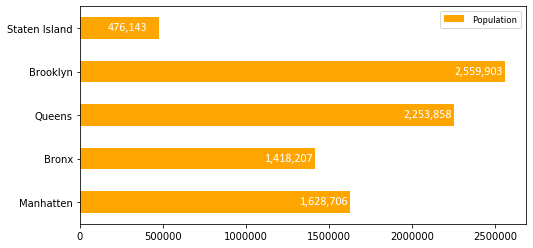

In [53]:
df6pop2=df6pop['Population']
df6pop2.plot(kind='barh', figsize=(8, 4), color = 'orange')

#plt.title('Population by Borough in NYC')
#plt.xlabel('Population')


font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.legend(fontsize=10)

# annotate value labels to each country
for index, value in enumerate(df6pop2): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 305000, index - 0.05), color='white')

plt.show()

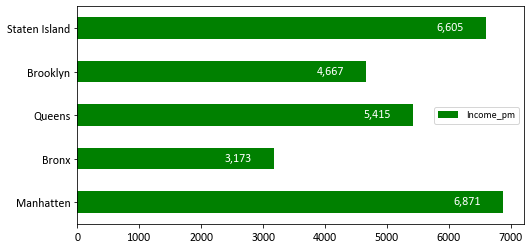

In [54]:
df6pop3=df6pop['Income_pm']
df6pop3.plot(kind='barh', figsize=(8, 4), color = 'green')

#plt.title('Avereage Monthly Income by Borough in NYC')
#plt.xlabel('Income $ per month')

font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.legend(fontsize=10)


# annotate value labels to each country
for index, value in enumerate(df6pop3): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 800, index - 0.05), color='white')

plt.show()

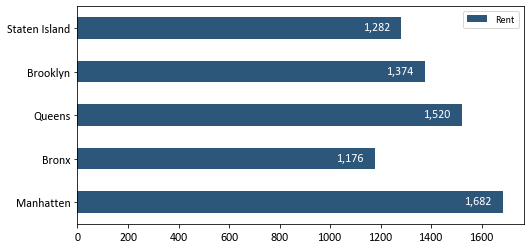

In [102]:
df6pop4=df6pop['Rent']
df6pop4.plot(kind='barh', figsize=(8, 4), color = '#2C567A')

#plt.title('Median Monthly Rent by Borough in NYC')
#plt.xlabel('Rent $ per month \n  Source:1')

font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.legend(fontsize=10)

# annotate value labels to each country
for index, value in enumerate(df6pop4): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 150, index - 0.05), color='white')

plt.show()

In [32]:
import pandas as pd
#Read in data and create data frame
csv_path3 = 'C:/Users/afrop/OneDrive/Documents/WORK/Python/Coursera_Capstone/Week4_5/SourceData/Apartment-List-Rent-Data-City_2020-5_.csv'
df7 = pd.read_csv(csv_path3)
df7.head(10)

,Location,Location_Type,State,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,...,Price_2019_08,Price_2019_09,Price_2019_10,Price_2019_11,Price_2019_12,Price_2020_01,Price_2020_02,Price_2020_03,Price_2020_04,Price_2020_05
0,"New York, NY",City,NY,Studio,1780.0,1778.0,1781.0,1786.0,1794.0,1802.0,...,1928.0,1922.0,1937.0,1940.0,1943,1939,1938,1939,1934,1923
1,"New York, NY",City,NY,1br,1976.0,1975.0,1978.0,1983.0,1992.0,2001.0,...,2142.0,2134.0,2151.0,2155.0,2158,2153,2152,2153,2148,2135
2,"New York, NY",City,NY,2br,2354.0,2352.0,2356.0,2362.0,2373.0,2384.0,...,2551.0,2542.0,2562.0,2567.0,2570,2565,2564,2565,2559,2543
3,"New York, NY",City,NY,3br,3036.0,3033.0,3038.0,3046.0,3060.0,3074.0,...,3289.0,3278.0,3304.0,3310.0,3314,3307,3306,3308,3300,3279
4,"New York, NY",City,NY,4br,3381.0,3378.0,3383.0,3392.0,3407.0,3424.0,...,3663.0,3651.0,3680.0,3686.0,3691,3684,3682,3684,3675,3652
5,"Los Angeles, CA",City,CA,Studio,957.0,961.0,964.0,969.0,972.0,975.0,...,1151.0,1152.0,1151.0,1150.0,1150,1151,1151,1151,1149,1146
6,"Los Angeles, CA",City,CA,1br,1139.0,1143.0,1147.0,1153.0,1156.0,1160.0,...,1370.0,1371.0,1370.0,1369.0,1369,1370,1370,1370,1368,1364
7,"Los Angeles, CA",City,CA,2br,1463.0,1469.0,1474.0,1481.0,1486.0,1491.0,...,1761.0,1761.0,1760.0,1760.0,1759,1760,1761,1761,1758,1753
8,"Los Angeles, CA",City,CA,3br,1989.0,1997.0,2004.0,2013.0,2020.0,2026.0,...,2393.0,2394.0,2392.0,2391.0,2391,2392,2393,2393,2389,2382
9,"Los Angeles, CA",City,CA,4br,2193.0,2201.0,2209.0,2220.0,2227.0,2234.0,...,2639.0,2640.0,2637.0,2637.0,2637,2637,2638,2638,2634,2627


In [33]:
df7pop = df7.loc[df7['Location'] == 'New York, NY']
df7pop=df7pop[['Location','Location_Type', 'Bedroom_Size','Price_2020_05' ]]
df7pop.head()
#df7pop.dtypes

,Location,Location_Type,Bedroom_Size,Price_2020_05
0,"New York, NY",City,Studio,1923
1,"New York, NY",City,1br,2135
2,"New York, NY",City,2br,2543
3,"New York, NY",City,3br,3279
4,"New York, NY",City,4br,3652


In [34]:
df7pop4=df7pop[['Bedroom_Size','Price_2020_05']]
df7pop4

,Bedroom_Size,Price_2020_05
0,Studio,1923
1,1br,2135
2,2br,2543
3,3br,3279
4,4br,3652


# 4. NYC map - with Folium

In [35]:
#Recap: df3: average house price data 
#       df6pop: population, rent and income data 

In [36]:
address = 'New York'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [37]:
neighborhoods = df3

# create map of NYC using latitude and longitude values
map_NYC = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood, house_price in zip(neighborhoods['LAT'], neighborhoods['LNG'], neighborhoods['City'], neighborhoods['Borough'], neighborhoods['AVE House Price $']):
    label = '{}, {}'.format(borough, house_price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='teal',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYC)  
    
map_NYC

Percentiles for average house prices

In [38]:
p25 = np.percentile(df3['AVE House Price $'],25)
p50 = np.percentile(df3['AVE House Price $'],50)
p75 = np.percentile(df3['AVE House Price $'],75)
print(p25, p50, p75)

487519.25 594233.5 880048.0


# 4.(b) Plot average house prices on NYC map

In [39]:
data = df3

# create map of NYC using latitude and longitude values
map_NYC2 = folium.Map(location=[latitude, longitude], zoom_start=13)
ave_val = df3['AVE House Price $']

data = df3

for i in range(0,len(data)):
   folium.Circle(
    location=[data.iloc[i]['LAT'], data.iloc[i]['LNG']],
    popup=str(data.iloc[i]['Borough'])+":"+str(data.iloc[i]['AVE House Price $']),
    radius=float(data.iloc[i]['AVE House Price $']/5000),
    color = 'crimson',
    fill=True,
    fill_color='teal'
   ).add_to(map_NYC2)
map_NYC2.save('NYC_HOUSE_TEST.html')
map_NYC2

# 5. NYC details of amenities (from Foursquare)

In [40]:
CLIENT_ID = 'PF24JWX2Z3FIDODQ2VQ3Z4ZUF0RF1U021R521EHH1ORT45HY' # your Foursquare ID
CLIENT_SECRET = '1EKZU4FTSMQT5PACGNAMGUWLJYVRVC4Z1J0BHOLU3LVHC5LB' # your Foursquare Secret
VERSION = '20200603' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PF24JWX2Z3FIDODQ2VQ3Z4ZUF0RF1U021R521EHH1ORT45HY
CLIENT_SECRET:1EKZU4FTSMQT5PACGNAMGUWLJYVRVC4Z1J0BHOLU3LVHC5LB


In [41]:
df3.head()

,City,Borough,ZIP,AVE House Price $,LAT,LNG
0,New York,Manhatten,10025,1110230,40.798601,-73.966622
1,New York,Manhatten,10023,1204832,40.775921,-73.982607
2,New York,Manhatten,10002,967241,40.715775,-73.986212
3,New York,Brooklyn,11226,637636,40.646448,-73.956649
4,New York,Bronx,10467,194279,40.869953,-73.865746


In [42]:
#TOP100 venues
neighborhood_latitude = latitude
neighborhood_longitude = longitude

search_query = 'search'
radius = 500
LIMIT = 100

#url = 'https://api.foursquare.com/v2/venues/explore?CLIENT_ID={}&CLIENT_SECRET={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#url

#OR this one
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PF24JWX2Z3FIDODQ2VQ3Z4ZUF0RF1U021R521EHH1ORT45HY&client_secret=1EKZU4FTSMQT5PACGNAMGUWLJYVRVC4Z1J0BHOLU3LVHC5LB&v=20200603&ll=40.7127281,-74.0060152&radius=500&limit=100'

In [43]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee3375c43f8670d914bdff2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'labe

In [44]:
manhatten_data = df3.loc[df3['Borough'] == 'Manhatten']
manhatten_LAT = manhatten_data['LAT'].mean()
manhatten_LNG = manhatten_data['LNG'].mean()

brooklyn_data = df3.loc[df3['Borough'] == 'Brooklyn']
brooklyn_LAT = brooklyn_data['LAT'].mean()
brooklyn_LNG = brooklyn_data['LNG'].mean()

bronx_data = df3.loc[df3['Borough'] == 'Bronx']
bronx_LAT = bronx_data['LAT'].mean()
bronx_LNG = bronx_data['LNG'].mean()

queens_data = df3.loc[df3['Borough'] == 'Queens']
queens_LAT = queens_data['LAT'].mean()
queens_LNG = queens_data['LNG'].mean()

staten_data = df3.loc[df3['Borough'] == 'Staten Island']
staten_LAT = staten_data['LAT'].mean()
staten_LNG = staten_data['LNG'].mean()

Function to explore neighborhoods (Boroughs) in NYC

In [45]:
#function to get nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    
    return(nearby_venues)

In [46]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [47]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

C:\Users\afrop\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
3,City Hall Park,Park,40.712415,-74.006724
4,Augustine,French Restaurant,40.711310,-74.006660
5,The Wooly Daily,Coffee Shop,40.712137,-74.008395
6,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734
7,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661
8,CrossFit 212 TriBeCa,Gym,40.714537,-74.005999
9,Takahachi Bakery,Bakery,40.713653,-74.008804


# Explore Manhatten

In [48]:
manhatten_venues = getNearbyVenues(names=manhatten_data['Borough'],
                                   latitudes=manhatten_data['LAT'],
                                   longitudes=manhatten_data['LNG']
                                  )

Found 3575 venues in 48 neighborhoods.


In [49]:
print(manhatten_venues.shape)
manhatten_venues.head()

(3575, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhatten,40.798601,-73.966622,Yoga To The People,40.799588,-73.968197,Yoga Studio
1,Manhatten,40.798601,-73.966622,Broadway Dive,40.797976,-73.969317,Bar
2,Manhatten,40.798601,-73.966622,Silver Moon Bakery,40.800477,-73.967999,Bakery
3,Manhatten,40.798601,-73.966622,Mama's Too,40.800780,-73.967626,Pizza Place
4,Manhatten,40.798601,-73.966622,Shiny Tea,40.798196,-73.969274,Bubble Tea Shop


In [50]:
manhatten_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,4,4,4,4,4,4
Adult Boutique,2,2,2,2,2,2
Afghan Restaurant,2,2,2,2,2,2
African Restaurant,3,3,3,3,3,3
American Restaurant,72,72,72,72,72,72
Antique Shop,1,1,1,1,1,1
Arcade,1,1,1,1,1,1
Arepa Restaurant,2,2,2,2,2,2
Argentinian Restaurant,2,2,2,2,2,2


In [51]:
manhatten_top10 = manhatten_venues.groupby('Venue Category').count()
manhatten_top10.sort_values(by=['Neighborhood'], inplace=True, ascending=False)
manhatten_top10.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,172,172,172,172,172,172
Italian Restaurant,117,117,117,117,117,117
Pizza Place,111,111,111,111,111,111
Gym / Fitness Center,81,81,81,81,81,81
Bar,79,79,79,79,79,79
Bakery,75,75,75,75,75,75
Mexican Restaurant,75,75,75,75,75,75
Gym,73,73,73,73,73,73
American Restaurant,72,72,72,72,72,72


# Explore Brooklyn

In [56]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Borough'],
                                   latitudes=brooklyn_data['LAT'],
                                   longitudes=brooklyn_data['LNG']
                                  )

Found 1641 venues in 37 neighborhoods.


In [57]:
brooklyn_top10 = brooklyn_venues.groupby('Venue Category').count()
brooklyn_top10.sort_values(by=['Neighborhood'], inplace=True, ascending=False)
brooklyn_top10.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Pizza Place,85,85,85,85,85,85
Bar,60,60,60,60,60,60
Coffee Shop,56,56,56,56,56,56
Bakery,51,51,51,51,51,51
Chinese Restaurant,49,49,49,49,49,49
Deli / Bodega,46,46,46,46,46,46
Mexican Restaurant,38,38,38,38,38,38
Caribbean Restaurant,32,32,32,32,32,32
Café,31,31,31,31,31,31


# Explore Queens

In [58]:
queens_venues = getNearbyVenues(names=queens_data['Borough'],
                                   latitudes=queens_data['LAT'],
                                   longitudes=queens_data['LNG']
                                  )

Found 1583 venues in 55 neighborhoods.


In [59]:
queens_top10 = queens_venues.groupby('Venue Category').count()
queens_top10.sort_values(by=['Neighborhood'], inplace=True, ascending=False)
queens_top10.head(100)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Pizza Place,74,74,74,74,74,74
Chinese Restaurant,73,73,73,73,73,73
Deli / Bodega,64,64,64,64,64,64
Bakery,54,54,54,54,54,54
Donut Shop,43,43,43,43,43,43
Pharmacy,40,40,40,40,40,40
Bar,33,33,33,33,33,33
Sandwich Place,30,30,30,30,30,30
Coffee Shop,30,30,30,30,30,30


# Drill deeper into Manhatten

In [71]:
import urllib.request
url_M = "https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City#Neighborhoods_by_borough"
page = urllib.request.urlopen(url_M)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Neighborhoods in New York City - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"616cde89-65ad-4864-9265-270221f884b2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Neighborhoods_in_New_York_City","wgTitle":"Neighborhoods in New York City","wgCurRevisionId":952747829,"wgRevisionId":952747829,"wgArticleId":6005329,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Neighborhoods in New York City"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRel

In [73]:
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable">
 <caption>Community Boards in New York City
 </caption>
 <tbody><tr bgcolor="#CCCCCC">
 <th>Community Board<br/>(CB)</th>
 <th>Area<br/>km<sup>2</sup></th>
 <th>Pop.<br/>Census<br/>2010</th>
 <th>Pop./<br/>km<sup>2</sup></th>
 <th class="unsortable">Neighborhoods
 </th></tr>
 <tr>
 <td><a href="/wiki/Bronx_Community_Board_1" title="Bronx Community Board 1">Bronx CB 1</a></td>
 <td align="right">7.17</td>
 <td align="right">91,497</td>
 <td align="right">12,761</td>
 <td><a href="/wiki/Melrose,_Bronx" title="Melrose, Bronx">Melrose</a>, <a href="/wiki/Mott_Haven,_Bronx" title="Mott Haven, Bronx">Mott Haven</a>, <a href="/wiki/Port_Morris,_Bronx" title="Port Morris, Bronx">Port Morris</a>
 </td></tr>
 <tr>
 <td><a href="/wiki/Bronx_Community_Board_2" title="Bronx Community Board 2">Bronx CB 2</a></td>
 <td align="right">5.54</td>
 <td align="right">52,246</td>
 <td align="right">9,792</td>
 <td><a href="/wiki/Hunts_Point,_Bronx" title="Hunts Point, Bro

In [74]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<caption>Community Boards in New York City
</caption>
<tbody><tr bgcolor="#CCCCCC">
<th>Community Board<br/>(CB)</th>
<th>Area<br/>km<sup>2</sup></th>
<th>Pop.<br/>Census<br/>2010</th>
<th>Pop./<br/>km<sup>2</sup></th>
<th class="unsortable">Neighborhoods
</th></tr>
<tr>
<td><a href="/wiki/Bronx_Community_Board_1" title="Bronx Community Board 1">Bronx CB 1</a></td>
<td align="right">7.17</td>
<td align="right">91,497</td>
<td align="right">12,761</td>
<td><a href="/wiki/Melrose,_Bronx" title="Melrose, Bronx">Melrose</a>, <a href="/wiki/Mott_Haven,_Bronx" title="Mott Haven, Bronx">Mott Haven</a>, <a href="/wiki/Port_Morris,_Bronx" title="Port Morris, Bronx">Port Morris</a>
</td></tr>
<tr>
<td><a href="/wiki/Bronx_Community_Board_2" title="Bronx Community Board 2">Bronx CB 2</a></td>
<td align="right">5.54</td>
<td align="right">52,246</td>
<td align="right">9,792</td>
<td><a href="/wiki/Hunts_Point,_Bronx" title="Hunts Point, Bronx">Hunts Point</a>, <a

In [75]:
A=[]
B=[]
C=[]
D=[]
E=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==5:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))

In [76]:
import pandas as pd
dfNYC_hoods=pd.DataFrame(A,columns=['Community'])
dfNYC_hoods['Area']=B
dfNYC_hoods['Pop2010']=C
dfNYC_hoods['Pop density']=D
dfNYC_hoods['Neighborhood']=E
dfNYC_hoods

,Community,Area,Pop2010,Pop density,Neighborhood
0,Bronx CB 1,7.17,"91,497","12,761",Melrose
1,Bronx CB 2,5.54,"52,246","9,792",Hunts Point
2,Bronx CB 3,4.07,"79,762","19,598",Claremont
3,Bronx CB 4,5.28,"146,441","27,735",Concourse
4,Bronx CB 5,3.55,"128,200","36,145",Fordham
5,Bronx CB 6,4.01,"83,268","20,765",Bathgate
6,Bronx CB 7,4.84,"139,286","28,778",Bedford Park
7,Bronx CB 8,8.83,"101,731","11,521",Fieldston
8,Bronx CB 9,12.41,"172,298","13,884",Bronx River
9,Bronx CB 10,16.76,"120,392","7,183",City Island


In [78]:
dfNYC_hoods2 = dfNYC_hoods.iloc[30:41]
dfNYC_hoods2

,Community,Area,Pop2010,Pop density,Neighborhood
30,Manhattan CB 1,4.45,"34,420","7,735",Battery Park City
31,Manhattan CB 2,4.01,"93,119","23,222",Chinatown
32,Manhattan CB 3,4.56,"164,407","36,054",Alphabet City
33,Manhattan CB 4,5.41,"87,479","16,170",Chelsea
34,Manhattan CB 5,4.25,"44,028","10,360",Midtown
35,Manhattan CB 6,3.55,"136,152","38,353",Gramercy Park
36,Manhattan CB 7,5.46,"207,699","38,040",Lincoln Square
37,Manhattan CB 8,5.13,"217,063","42,312",Lenox Hill
38,Manhattan CB 9,3.91,"111,724","28,574",Hamilton Heights
39,Manhattan CB 10,3.63,"107,109","29,507",Harlem


In [79]:
def myfunction(name):
    address = name
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return(latitude)

def myfunction2(name):
    address = name
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return(longitude)

In [80]:
myfunction('Los Angeles')

34.0536909

In [81]:
dfNYC_hoods2['LAT'] = dfNYC_hoods2['Neighborhood'].apply(myfunction)
dfNYC_hoods2['LNG'] = dfNYC_hoods2['Neighborhood'].apply(myfunction2)

C:\Users\afrop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\afrop\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
dfNYC_hoods2

,Community,Area,Pop2010,Pop density,Neighborhood,LAT,LNG
30,Manhattan CB 1,4.45,"34,420","7,735",Battery Park City,40.711017,-74.016937
31,Manhattan CB 2,4.01,"93,119","23,222",Chinatown,40.716491,-73.996250
32,Manhattan CB 3,4.56,"164,407","36,054",Alphabet City,40.725102,-73.979583
33,Manhattan CB 4,5.41,"87,479","16,170",Chelsea,51.487542,-0.168220
34,Manhattan CB 5,4.25,"44,028","10,360",Midtown,40.760109,-73.978163
35,Manhattan CB 6,3.55,"136,152","38,353",Gramercy Park,40.737925,-73.985932
36,Manhattan CB 7,5.46,"207,699","38,040",Lincoln Square,40.772319,-73.984401
37,Manhattan CB 8,5.13,"217,063","42,312",Lenox Hill,40.766437,-73.959017
38,Manhattan CB 9,3.91,"111,724","28,574",Hamilton Heights,40.824145,-73.950062
39,Manhattan CB 10,3.63,"107,109","29,507",Harlem,40.807879,-73.945415


In [83]:
manhatten_venues2 = getNearbyVenues(names=dfNYC_hoods2['Neighborhood'],
                                   latitudes=dfNYC_hoods2['LAT'],
                                   longitudes=dfNYC_hoods2['LNG']
                                  )

Found 904 venues in 11 neighborhoods.


In [84]:
print(manhatten_venues2.shape)
manhatten_venues2.head()

(904, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Battery Park City,40.711017,-74.016937,Battery Park City Esplanade,40.711622,-74.017907,Park
1,Battery Park City,40.711017,-74.016937,Institute of Culinary Education,40.712399,-74.015971,Cooking School
2,Battery Park City,40.711017,-74.016937,Hudson Eats,40.712666,-74.015901,Food Court
3,Battery Park City,40.711017,-74.016937,Equinox Brookfield Place,40.712704,-74.014995,Gym
4,Battery Park City,40.711017,-74.016937,"Waterfront Plaza, Brookfield Place",40.713241,-74.016241,Plaza


In [85]:
manhatten_venues2.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alphabet City,100,100,100,100,100,100
Battery Park City,92,92,92,92,92,92
Chelsea,42,42,42,42,42,42
Chinatown,100,100,100,100,100,100
East Harlem,42,42,42,42,42,42
Gramercy Park,99,99,99,99,99,99
Hamilton Heights,60,60,60,60,60,60
Harlem,100,100,100,100,100,100
Lenox Hill,100,100,100,100,100,100


In [86]:
print('There are {} uniques categories.'.format(len(manhatten_venues2['Venue Category'].unique())))

There are 217 uniques categories.


In [87]:
# one hot encoding
manhatten_onehot = pd.get_dummies(manhatten_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhatten_onehot['Neighborhood'] = manhatten_venues2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhatten_onehot.columns[-1]] + list(manhatten_onehot.columns[:-1])
manhatten_onehot = manhatten_onehot[fixed_columns]

manhatten_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Arcade,Argentinian Restaurant,Art Gallery,...,Trail,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Battery Park City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Battery Park City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Battery Park City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Battery Park City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
manhatten_onehot.shape

(904, 218)

In [89]:
manhatten_grouped = manhatten_onehot.groupby('Neighborhood').mean().reset_index()
manhatten_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Arcade,Argentinian Restaurant,Art Gallery,...,Trail,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Alphabet City,0.000000,0.00,0.00,0.010000,0.00,0.00,0.000000,0.01,0.010000,...,0.00000,0.00000,0.010000,0.000000,0.02000,0.040000,0.010000,0.00,0.00000,0.020000
1,Battery Park City,0.000000,0.00,0.00,0.010870,0.00,0.00,0.000000,0.00,0.000000,...,0.01087,0.01087,0.000000,0.000000,0.00000,0.000000,0.032609,0.00,0.00000,0.000000
2,Chelsea,0.000000,0.00,0.00,0.023810,0.00,0.00,0.000000,0.00,0.023810,...,0.00000,0.00000,0.000000,0.000000,0.02381,0.000000,0.000000,0.00,0.02381,0.000000
3,Chinatown,0.000000,0.00,0.00,0.000000,0.00,0.01,0.000000,0.00,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.03000,0.020000,0.000000,0.00,0.00000,0.010000
4,East Harlem,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,...,0.00000,0.00000,0.000000,0.023810,0.00000,0.023810,0.000000,0.00,0.00000,0.000000
5,Gramercy Park,0.000000,0.00,0.00,0.030303,0.00,0.00,0.010101,0.00,0.010101,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.010101,0.050505,0.00,0.00000,0.010101
6,Hamilton Heights,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.016667,0.000000,0.00,0.00000,0.033333
7,Harlem,0.000000,0.00,0.03,0.010000,0.01,0.00,0.000000,0.00,0.010000,...,0.00000,0.00000,0.010000,0.010000,0.00000,0.010000,0.010000,0.01,0.01000,0.010000
8,Lenox Hill,0.000000,0.01,0.00,0.000000,0.00,0.00,0.000000,0.00,0.010000,...,0.00000,0.00000,0.010000,0.000000,0.00000,0.020000,0.010000,0.00,0.01000,0.000000
9,Lincoln Square,0.000000,0.00,0.00,0.030000,0.00,0.00,0.000000,0.00,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.010000,0.010000,0.00,0.00000,0.000000


In [90]:
manhatten_grouped.shape

(11, 218)

In [91]:
num_top_venues = 5

for hood in manhatten_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhatten_grouped[manhatten_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alphabet City----
          venue  freq
0  Cocktail Bar  0.07
1           Bar  0.05
2      Wine Bar  0.04
3   Coffee Shop  0.04
4        Garden  0.03


----Battery Park City----
                venue  freq
0                Park  0.08
1         Coffee Shop  0.07
2               Hotel  0.04
3       Memorial Site  0.04
4  Mexican Restaurant  0.03


----Chelsea----
                venue  freq
0              Bakery  0.10
1                 Pub  0.07
2   French Restaurant  0.07
3  English Restaurant  0.07
4        Burger Joint  0.05


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.12
1              Bakery  0.07
2     Bubble Tea Shop  0.05
3      Sandwich Place  0.04
4      Ice Cream Shop  0.03


----East Harlem----
                       venue  freq
0                     Bakery  0.12
1                Pizza Place  0.10
2         Mexican Restaurant  0.10
3                 Donut Shop  0.05
4  Latin American Restaurant  0.05


----Gramercy Park----
                    

In [92]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhatten_grouped['Neighborhood']

for ind in np.arange(manhatten_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhatten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alphabet City,Cocktail Bar,Bar,Wine Bar,Coffee Shop,Salon / Barbershop,Italian Restaurant,Garden,Yoga Studio,Pizza Place,Park
1,Battery Park City,Park,Coffee Shop,Memorial Site,Hotel,Gym,Wine Shop,Plaza,Mexican Restaurant,Gourmet Shop,Scenic Lookout
2,Chelsea,Bakery,French Restaurant,Pub,English Restaurant,Ice Cream Shop,Burger Joint,Park,Garden,Café,Spa
3,Chinatown,Chinese Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Ice Cream Shop,Optical Shop,Spa,Cocktail Bar,Salon / Barbershop,Vietnamese Restaurant
4,East Harlem,Bakery,Pizza Place,Mexican Restaurant,Taco Place,Latin American Restaurant,Donut Shop,Pharmacy,Steakhouse,Spanish Restaurant,Shipping Store
5,Gramercy Park,Wine Shop,Italian Restaurant,New American Restaurant,Bar,American Restaurant,Park,Cosmetics Shop,Japanese Restaurant,Thrift / Vintage Store,Café
6,Hamilton Heights,Pizza Place,Mexican Restaurant,Deli / Bodega,Café,Coffee Shop,Chinese Restaurant,Yoga Studio,Sandwich Place,Sushi Restaurant,Bakery
7,Harlem,Clothing Store,Mobile Phone Shop,Cosmetics Shop,Burger Joint,Theater,Pizza Place,Southern / Soul Food Restaurant,African Restaurant,Café,Deli / Bodega
8,Lenox Hill,Coffee Shop,Italian Restaurant,Pizza Place,Salon / Barbershop,Café,Sushi Restaurant,Deli / Bodega,Gym,Burger Joint,Gym / Fitness Center
9,Lincoln Square,Italian Restaurant,Coffee Shop,French Restaurant,Plaza,Theater,Gym / Fitness Center,Concert Hall,Performing Arts Venue,Café,Hotel


# Cluster Neighborhoods 

In [94]:
#K MEANS CLUSTERING

# set number of clusters
kclusters = 5

manhatten_grouped_clustering = manhatten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhatten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 4, 0, 1, 3, 1, 3, 3, 2])

In [95]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhatten_merged = dfNYC_hoods2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhatten_merged = dfNYC_hoods2.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhatten_merged.head() # check the last columns!

,Community,Area,Pop2010,Pop density,Neighborhood,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Manhattan CB 1,4.45,"34,420","7,735",Battery Park City,40.711017,-74.016937,3,Park,Coffee Shop,Memorial Site,Hotel,Gym,Wine Shop,Plaza,Mexican Restaurant,Gourmet Shop,Scenic Lookout
31,Manhattan CB 2,4.01,"93,119","23,222",Chinatown,40.716491,-73.996250,0,Chinese Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Ice Cream Shop,Optical Shop,Spa,Cocktail Bar,Salon / Barbershop,Vietnamese Restaurant
32,Manhattan CB 3,4.56,"164,407","36,054",Alphabet City,40.725102,-73.979583,3,Cocktail Bar,Bar,Wine Bar,Coffee Shop,Salon / Barbershop,Italian Restaurant,Garden,Yoga Studio,Pizza Place,Park
33,Manhattan CB 4,5.41,"87,479","16,170",Chelsea,51.487542,-0.168220,4,Bakery,French Restaurant,Pub,English Restaurant,Ice Cream Shop,Burger Joint,Park,Garden,Café,Spa
34,Manhattan CB 5,4.25,"44,028","10,360",Midtown,40.760109,-73.978163,2,Hotel,Theater,Burger Joint,Steakhouse,Jewelry Store,Art Museum,Plaza,Food & Drink Shop,Sushi Restaurant,Vegetarian / Vegan Restaurant


In [96]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhatten_merged['LAT'], manhatten_merged['LNG'], manhatten_merged['Neighborhood'], manhatten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [97]:
#CLUSTER 1
manhatten_merged.loc[manhatten_merged['Cluster Labels'] == 0, manhatten_merged.columns[[1] + list(range(5, manhatten_merged.shape[1]))]]

,Area,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,4.01,40.716491,-73.99625,0,Chinese Restaurant,Bakery,Bubble Tea Shop,Sandwich Place,Ice Cream Shop,Optical Shop,Spa,Cocktail Bar,Salon / Barbershop,Vietnamese Restaurant


In [98]:
#CLUSTER 2
manhatten_merged.loc[manhatten_merged['Cluster Labels'] == 1, manhatten_merged.columns[[1] + list(range(5, manhatten_merged.shape[1]))]]

,Area,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,3.91,40.824145,-73.950062,1,Pizza Place,Mexican Restaurant,Deli / Bodega,Café,Coffee Shop,Chinese Restaurant,Yoga Studio,Sandwich Place,Sushi Restaurant,Bakery
40,5.75,40.794722,-73.942500,1,Bakery,Pizza Place,Mexican Restaurant,Taco Place,Latin American Restaurant,Donut Shop,Pharmacy,Steakhouse,Spanish Restaurant,Shipping Store


In [99]:
#CLUSTER 3
manhatten_merged.loc[manhatten_merged['Cluster Labels'] == 2, manhatten_merged.columns[[1] + list(range(5, manhatten_merged.shape[1]))]]

,Area,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,4.25,40.760109,-73.978163,2,Hotel,Theater,Burger Joint,Steakhouse,Jewelry Store,Art Museum,Plaza,Food & Drink Shop,Sushi Restaurant,Vegetarian / Vegan Restaurant
36,5.46,40.772319,-73.984401,2,Italian Restaurant,Coffee Shop,French Restaurant,Plaza,Theater,Gym / Fitness Center,Concert Hall,Performing Arts Venue,Café,Hotel


In [100]:
#CLUSTER 4
manhatten_merged.loc[manhatten_merged['Cluster Labels'] == 3, manhatten_merged.columns[[1] + list(range(5, manhatten_merged.shape[1]))]]

,Area,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,4.45,40.711017,-74.016937,3,Park,Coffee Shop,Memorial Site,Hotel,Gym,Wine Shop,Plaza,Mexican Restaurant,Gourmet Shop,Scenic Lookout
32,4.56,40.725102,-73.979583,3,Cocktail Bar,Bar,Wine Bar,Coffee Shop,Salon / Barbershop,Italian Restaurant,Garden,Yoga Studio,Pizza Place,Park
35,3.55,40.737925,-73.985932,3,Wine Shop,Italian Restaurant,New American Restaurant,Bar,American Restaurant,Park,Cosmetics Shop,Japanese Restaurant,Thrift / Vintage Store,Café
37,5.13,40.766437,-73.959017,3,Coffee Shop,Italian Restaurant,Pizza Place,Salon / Barbershop,Café,Sushi Restaurant,Deli / Bodega,Gym,Burger Joint,Gym / Fitness Center
39,3.63,40.807879,-73.945415,3,Clothing Store,Mobile Phone Shop,Cosmetics Shop,Burger Joint,Theater,Pizza Place,Southern / Soul Food Restaurant,African Restaurant,Café,Deli / Bodega


In [101]:
#CLUSTER 5
manhatten_merged.loc[manhatten_merged['Cluster Labels'] == 4, manhatten_merged.columns[[1] + list(range(5, manhatten_merged.shape[1]))]]

,Area,LAT,LNG,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,5.41,51.487542,-0.16822,4,Bakery,French Restaurant,Pub,English Restaurant,Ice Cream Shop,Burger Joint,Park,Garden,Café,Spa
